## Boston House Pirce

In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [4]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
X=boston.data
y=boston.target

In [6]:
reg=LinearRegression()
lasso_reg=Lasso(alpha=10)

reg.fit(X,y)
lasso_reg.fit(X,y)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [7]:
for a, b in zip(boston.feature_names, reg.coef_):
    print("%s: %f" %(a,b))

CRIM: -0.108011
ZN: 0.046420
INDUS: 0.020559
CHAS: 2.686734
NOX: -17.766611
RM: 3.809865
AGE: 0.000692
DIS: -1.475567
RAD: 0.306049
TAX: -0.012335
PTRATIO: -0.952747
B: 0.009312
LSTAT: -0.524758


In [9]:
for a, b in zip(boston.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

CRIM: -0.000000
ZN: 0.026146
INDUS: -0.000000
CHAS: 0.000000
NOX: 0.000000
RM: 0.000000
AGE: 0.000000
DIS: -0.000000
RAD: 0.000000
TAX: -0.009282
PTRATIO: -0.000000
B: 0.007496
LSTAT: -0.564038


## 해석
### 1. Lasso 함수의 alpha 값이 10일 때, 0이 아닌 유의미한 값을 가지는 항목들만이 집 값 변동의 유의미한 영향을 미친다고 보았습니다. 

### 아래의 네개의 항목들(굵기 표시한)이 가장 의미있는 항목들이라고 보았습니다.

crm = 범죄율

**zn =  특정 범위 내에서의 거주지역의 비율(주거의 밀집도)**

Indus = 상점이 얼마나 있는가의 비율

CHAS= 1이면 강가에 있음, 아니면 강가에 없음

NOX = 환경 오염의 비율

RM = 집마다 방이 몇개 있는가에 대한 수치                      

AGE = 집들이 얼마나 오래 되어있는지 보여주는 비율    

DIS = 직장에서의 거리                                      

RAD = 고속도로와의 접근성

**TAX = 재산세**

PTRATIO = 도시내의 학생-교사 비율(교육에 관한 수치)

**B = 한 마을에 흑인이 거주하는 비율**

**LSTAT = 인구당 저 소득층의 비율**

### ※ 주로 *_저소득층의 비율과 주거의 밀집도, 재산세 등 일반적인 수치가 집 값에 가장 큰 영향을 주었던 것 같습니다._* 그러면  alpha값을 약간 내려서 집 값의 더 많은 요인을 살펴 보겠습니다.

In [10]:
reg=LinearRegression()
lasso_reg=Lasso(alpha=3)

reg.fit(X,y)
lasso_reg.fit(X,y)

Lasso(alpha=3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [11]:
for a, b in zip(boston.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

CRIM: -0.000000
ZN: 0.037231
INDUS: -0.000000
CHAS: 0.000000
NOX: 0.000000
RM: 0.000000
AGE: 0.042495
DIS: -0.000000
RAD: 0.061864
TAX: -0.008602
PTRATIO: -0.265072
B: 0.006510
LSTAT: -0.807679


### alpha 값을 3으로 낮추면, 좀 더 많은 항목들이 나온다. PTRATIO, RAD, AGE 순으로 나타난다.

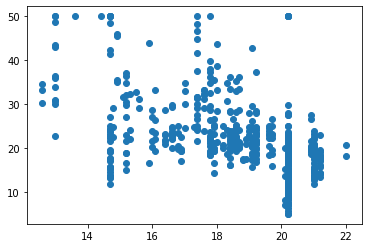

In [19]:
import matplotlib.pyplot as plt
x=[i[10] for i in X]
plt.scatter(x,y)

위의 사진은 PTRATIO의 항목이다.비선형적인 특성이 강해서, alpha 값이 클 때는 유의미한 결과값을 나타나지 않았던 것 같다.

다시 alpha 값이 3인 기준으로(where alpha = 3), 집 값을 결정하는 가장 큰 요인 세가지는, 크기 순으로 LSTAT, PTRATIO, RAD 순으로 나타났다.

어느 나라에서든, 맹모삼천이라 하여 교육에 관련한 요인이 집값에 큰 요인을 주었던 것 같습니다. 더군다나 보스턴은 유명한 학교들이 많고, 대도시라 미국 평균적인 도시들보다 교육적인 특성이 집 값에 더 큰 영향을 미춰었던 것 같습니다. 만약 우리나라 였다면, LSTAT, PTRATIO 말고 ZN이라는 항목이 큰 영향을 미췄을 것 같습니다. 수도권이나 서울이라는 한정적인 공간에서 너무나 많은 사람들이 밀집해 있으니깐요, 비교적 대도시지만, 주거 밀집도와는 집 값의 상관 관계는 미국에서는 비교적 찾아보기 힘들었습니다.

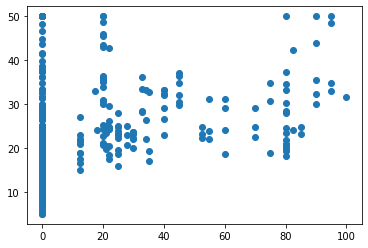

In [26]:
import matplotlib.pyplot as plt 
x=[i[1] for i in X]
plt.scatter(x,y)

위의 사진은 ZN 항목을 나타내는 그래프이고, 기울기가 비교적 완만하다는 것을 볼 수 있고, 특별히 선형적인 특성을 보기 힘듭니다.